# Exploring JSON Files (Spring 2023)
----------------------------------
**Dr. Dave Wanik - OPIM 5502: Big Data Analytics with Cloud Computing - University of Connecticut**

The purpose of this project is to get you comfortable working with JSON files. 

* Your name here:Shailesh Yadav
* Your NetID here:sry22001

# Download Data

In [ ]:
!gdown 1ejm645rRkuIdt1VETpICmJbLGyxMCf7F
!gdown 1nGfw8MOq_gYV55uJuFQ_1wgjpSIsvVw1

Downloading...
From: https://drive.google.com/uc?id=1ejm645rRkuIdt1VETpICmJbLGyxMCf7F
To: /content/Files/Ukraine.json
100% 33.5k/33.5k [00:00<00:00, 40.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nGfw8MOq_gYV55uJuFQ_1wgjpSIsvVw1
To: /content/Files/London.json
100% 30.6k/30.6k [00:00<00:00, 36.9MB/s]


# Install Spark

In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
# note that this is grabbing from the archive
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

# findspark
import findspark
findspark.init()

# Start session

We start the builder pattern `SparkSession.builder` and then chain a configuration parameter that defined the application name.

Providing a useful `appName` helps you identify which programs are running on your Spark cluster.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("Exploring_JSON_actors")\
        .getOrCreate()

In [ ]:
import pyspark.sql.functions as F

# Q1.  Inspect the .html and .json files

Imagine that someone just sent you the search results for these two queries. You can see that someone has been searching for 'top actors' in various cities (Kyiv, Ukraine and London, England.) The first geographic name referes to the 'top actors', and while the second set of geographic names looks duplicative, it is actually where you are telling Google to search from! 

If you dig through the two JSON files, you can actually click through and see the HTML result! It is buried in the JSON file but you can find it after looking around. Just lop off the **%7C** at the end and you can see the raw webpage you grabbed.
* https://serpapi.com/searches/2667d9f1ec89c315/63f12abf33b236a2bb4e555d.html%7C

Here are the clean HTML files:
* https://serpapi.com/searches/0fb523f94d3aeeac/63f12abda3f4ef6286fc8dfd.html
* https://serpapi.com/searches/2667d9f1ec89c315/63f12abf33b236a2bb4e555d.html

You can also replace the .html and just get the .json right away, too.
* https://serpapi.com/searches/0fb523f94d3aeeac/63f12abda3f4ef6286fc8dfd.json
* https://serpapi.com/searches/2667d9f1ec89c315/63f12abf33b236a2bb4e555d.json


Now that you have examined both the .html and .json files for these two search queries, **write down three interesting observations that you see**. Pay attention to how the structure of the .html website is efficiently captured in the .json file. No code here - just your qualitative observations.

## Interesting Thing 1


Search query for London produced 354 million results while for Ukraine it produced about 9 million results. This disparity could be because the number of actors in London are much more than that in Ukraine, and thus the search results for London are significantly higher.

## Interesting Thing 2

The language in the menu items and at several other place for the search query of London is not English, while it is for Ukraine, and the menu items are different as well for both the search results.

When we look just below the search bar in the html or in the json file if we have a look at the 'menu_items' inside 'search_information', we can observe the difference. 


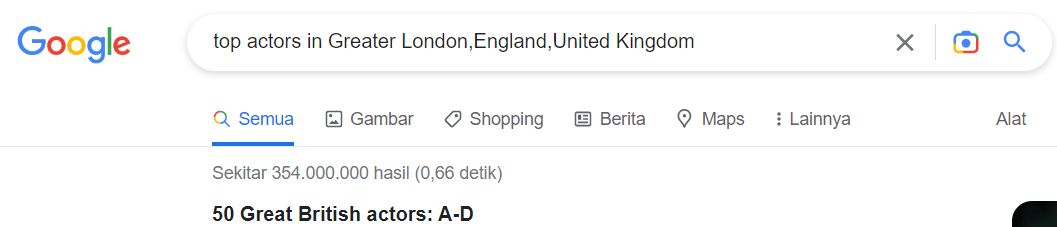

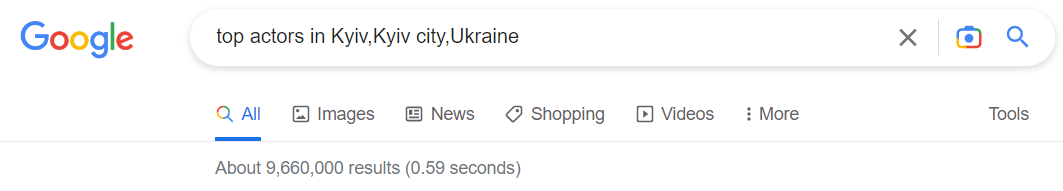

## Interesting Thing 3

The structure of the two json files are very different and it represents the differences observed in the two search results.

1. The 'menu_items' in json for London are followed by 'related_questions' in search query for London, as the html page contains related questions, while there is no such section in search query for Ukraine.
2. The 'menu_items' in json for Ukraine is followed by 'inline_images' as the search query outputs a section for images for top actors in Ukraine, while there is no such section in the search query for London.
3. There is an 'answer_box' section in json file of London which is the the section visible just below the search bar of google in the html file, with the title 50 Great British Actors. Since there is no such section in search result for Ukraine, there is no such section in the json file as well.
4. At the end of the json, there is a section for 'pagination'. This is the area where google contains the links for next pages. There are 5 for Ukraine while 10 for London.

# 🔴 Ukraine

I think this is the easier file to work with, so let's start here.

# Q2. Read the Ukraine .json file and printSchema()

In [ ]:
# Let's make a new folder to keep the json files
%mkdir ./Files

mkdir: cannot create directory ‘./Files’: File exists


In [ ]:
# We'll move the json files to new folder
%mv *.json /content/Files

mv: 'London.json' and '/content/Files/London.json' are the same file
mv: 'Ukraine.json' and '/content/Files/Ukraine.json' are the same file


In [ ]:
# Let's make this folder as the current directory
%cd /content/Files

/content/Files


In [ ]:
# Let's check if it worked
%pwd

'/content/Files'

In [ ]:
# Let's see the list of files in this folder
%ls

Files/       spark-3.0.0-bin-hadoop3.2/     spark-3.0.0-bin-hadoop3.2.tgz.1
London.json  spark-3.0.0-bin-hadoop3.2.tgz  Ukraine.json


In [ ]:
# Let's read the json file
Ukraine = spark.read.json("./Files/Ukraine.json")

In [ ]:
# First we'll check the schema
Ukraine.printSchema()

root
 |-- inline_images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- link: string (nullable = true)
 |    |    |-- original: string (nullable = true)
 |    |    |-- source: string (nullable = true)
 |    |    |-- source_name: string (nullable = true)
 |    |    |-- thumbnail: string (nullable = true)
 |    |    |-- title: string (nullable = true)
 |-- organic_results: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- about_page_link: string (nullable = true)
 |    |    |-- about_page_serpapi_link: string (nullable = true)
 |    |    |-- about_this_result: struct (nullable = true)
 |    |    |    |-- source: struct (nullable = true)
 |    |    |    |    |-- description: string (nullable = true)
 |    |    |    |    |-- icon: string (nullable = true)
 |    |    |    |    |-- security: string (nullable = true)
 |    |    |    |    |-- source_info_link: string (nullable = true)
 |    |    |-- cached_page_link: 

Describe what you see in the schema.

We can see that at first there is the root object which contains several other nested objects.

PySpark took every top-level key -> the keys from the root object —> and parsed them as columns.
When a column had a scalar value, the type was inferred according to the JSON specification

At the first level of nesting, we have the following objects:
- inline_images
- organic_results
- pagination
- related_searches
- search_information
- search_metadata
- search_parameters
- serpapi_pagination

Each of these objects have further levels of nesting inside of them.

**These objects appear in alphabetical order and not in the order in which they are present in json.**

# Q3. Extract the `organic_results.snippet` from the Ukraine .json
Are there any actors listed here? What does the output look like?

In [ ]:
# First, let's get the column names
Ukraine.columns

['inline_images',
 'organic_results',
 'pagination',
 'related_searches',
 'search_information',
 'search_metadata',
 'search_parameters',
 'serpapi_pagination']

In [ ]:
# Let's check the schema in 'organic_results'
org_res = Ukraine.select("organic_results")
org_res.printSchema()

root
 |-- organic_results: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- about_page_link: string (nullable = true)
 |    |    |-- about_page_serpapi_link: string (nullable = true)
 |    |    |-- about_this_result: struct (nullable = true)
 |    |    |    |-- source: struct (nullable = true)
 |    |    |    |    |-- description: string (nullable = true)
 |    |    |    |    |-- icon: string (nullable = true)
 |    |    |    |    |-- security: string (nullable = true)
 |    |    |    |    |-- source_info_link: string (nullable = true)
 |    |    |-- cached_page_link: string (nullable = true)
 |    |    |-- date: string (nullable = true)
 |    |    |-- displayed_link: string (nullable = true)
 |    |    |-- displayed_results: string (nullable = true)
 |    |    |-- link: string (nullable = true)
 |    |    |-- position: long (nullable = true)
 |    |    |-- related_results: array (nullable = true)
 |    |    |    |-- element: struct (containsNull =

In [ ]:
# Method1
# This code first converts the object in seperate columns and then selects the snippet column
# This makes the next questions much easier to attempt
org_res_columns = org_res.withColumn("subset",F.explode("organic_results")).select('subset.*')
org_res_columns.select("snippet").show(truncate = False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|snippet                                                                                                                                                  |
+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|Alec Utgoff is a British actor best known for playing 'Alexei' in the Netflix hit show, ... Ivanna Sakhno was born on November 14, 1997 in Kiev, Ukraine.|
|From Ben Stiller to Jessica Chastain, celebrities have embraced Ukraine's president and offered support to the country's war effort.                     |
|Zelenskyy wrote on his social media page that Sean Penn is in Ukraine filming a movie about the war. He also said that Penn was in Ukraine ...           |
|Ukrainian actor Roman Matsiyta was ready to fight once the war 

In [ ]:
# Method2
# We can directly obtain just the snippet using the following code as well
org_res.select(F.explode('organic_results.snippet').alias("snippet")).show(truncate = False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|snippet                                                                                                                                                  |
+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|Alec Utgoff is a British actor best known for playing 'Alexei' in the Netflix hit show, ... Ivanna Sakhno was born on November 14, 1997 in Kiev, Ukraine.|
|From Ben Stiller to Jessica Chastain, celebrities have embraced Ukraine's president and offered support to the country's war effort.                     |
|Zelenskyy wrote on his social media page that Sean Penn is in Ukraine filming a movie about the war. He also said that Penn was in Ukraine ...           |
|Ukrainian actor Roman Matsiyta was ready to fight once the war 

Yes, there are actors listed in the 'snippet'

The ouput resembles the text that we see below the links in the html page.

# Q4. Extract the `organic_results.snippet_highlighted_words` from the Ukraine .json
Are there any actors listed here? What does the output look like?

In [ ]:
# We can easily select this column from the dataframe we created earlier
org_res_columns.select("snippet_highlighted_words").show(truncate = False)

+------------------------------+
|snippet_highlighted_words     |
+------------------------------+
|[actor best, Kiev, Ukraine]   |
|[Ukraine's]                   |
|null                          |
|[Ukrainian actor]             |
|[Ukrainian, actor]            |
|[actor, city, Ukrainian, Kyiv]|
|[Top Kyiv, Kyiv, Ukraine]     |
|[city, Kyiv, Ukrainian, city] |
+------------------------------+



There does not seem to be any actor listed in the output.

The output resembles the highlighted words below the links, i.e. in the snippets in the html page.

# Q5. Extract the `search_parameters.q` to get the name of the search query
Does the search you extracted match the search on the HTML page?



In [ ]:
Ukraine.select('search_parameters.q').show(truncate = False)

+------------------------------------+
|q                                   |
+------------------------------------+
|top actors in Kyiv,Kyiv city,Ukraine|
+------------------------------------+



It matches the search query on the html page.

# Q6. Extract the list of 12 names listed as the first SERP result from the Ukraine .json
Where was this information hiding in the .json?

In [ ]:
# This information is present in the rich_snippet_list inside organic results
org_res_columns.select(F.explode("rich_snippet_list").alias('names')).show(12, truncate = False)

+----------------+
|names           |
+----------------+
|Ivanna Sakhno   |
|Natalie Burn    |
|Gene Stupnitsky |
|Ilia Volok      |
|Oleg Zagorodnii |
|Aleksey Gorbunov|
|Ana Layevska    |
|Larisa Polonsky |
|Anna Sten       |
|Vadim Perelman  |
|Anna Sedokova   |
|Alex Feldman    |
+----------------+



This information is present under 'rich_snippet_list' nested inside the first entry in 'organic_results'.

# Q7. Extract a list of the 9 websites listed on the Ukraine .json
Sometimes Google (SERP API) does not return 10 related searches, it will give you less! To be clear, I would like all of the links from the 9 positions within the organic results. Names should include imdb.com, theguardian.com, euronews.com etc.

In [ ]:
# First, let's get the links from organic_results
org_links1 = org_res_columns.select("link").withColumnRenamed('link', 'websites')
org_links1.show(truncate = False)

+------------------------------------------------------------------------------------------------------------------------------------+
|websites                                                                                                                            |
+------------------------------------------------------------------------------------------------------------------------------------+
|https://www.imdb.com/search/name/?birth_place=Kiev,+Ukraine                                                                         |
|https://www.theguardian.com/world/2023/jan/08/ukraine-how-zelenskiy-hollywood-man-of-the-hour                                       |
|https://www.euronews.com/video/2022/06/28/us-actor-penn-meets-zelenskyy-in-kyiv                                                     |
|https://nypost.com/2022/03/06/ukrainian-actor-who-played-soldier-takes-up-arms-vs-russians/                                         |
|https://www.newsweek.com/meet-zelensky-actor-ben-still

In [ ]:
# If we have a column of related_results in organic_results, we will extract the links from the related_results column and drop the null rows
if('related_results' in org_res_columns.columns):
  rres1 = org_res_columns.withColumn("subset",F.explode("related_results")).select('subset.link').dropna()
  rres1.show(truncate=False)

+-----------------------------------------------------+
|link                                                 |
+-----------------------------------------------------+
|https://www.imdb.com/search/name/?birth_place=Ukraine|
+-----------------------------------------------------+



In [ ]:
# Finally, we'll get the link from the answer box, if there is one
if('answer_box' in Ukraine.columns):
  ans_box_link1 = Ukraine.select('answer_box.link')
  ans_box_link1.show(truncate=False)
  flag = 0
else:
  print('No Answer Box')
  flag = 1

No Answer Box


In [ ]:
# Let's concatenate all the dataframes
from functools import reduce
if flag == 1:
  dfs1 = [org_links1, rres1]
else:
  dfs1 = [org_links1, rres1, ans_box_link1]

result1 = reduce(F.DataFrame.unionAll, dfs1)
result1.show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------+
|websites                                                                                                                            |
+------------------------------------------------------------------------------------------------------------------------------------+
|https://www.imdb.com/search/name/?birth_place=Kiev,+Ukraine                                                                         |
|https://www.theguardian.com/world/2023/jan/08/ukraine-how-zelenskiy-hollywood-man-of-the-hour                                       |
|https://www.euronews.com/video/2022/06/28/us-actor-penn-meets-zelenskyy-in-kyiv                                                     |
|https://nypost.com/2022/03/06/ukrainian-actor-who-played-soldier-takes-up-arms-vs-russians/                                         |
|https://www.newsweek.com/meet-zelensky-actor-ben-still

# 🔴 London

# Q8. Extract the list of famous actors from the first result on the London .json

```
Richard Foreman. Christian Bale. ...
Nick Briggs. Sean Bean. ...
Kate Beckinsale. ...
Dirk Bogarde. ...
Michael Caine. ...
John Cleese. ...
Sacha Baron Cohen. ..
```

This one is a bit tough to extract because it is 'hiding' in an answer box (notice how this first search result is prominent and specially formatted by Google.) It is NOT the first result (from Position 1) of the organic results.

While it is easy for you to just retrieve the answer (once you find it in the JSON), why not practice your PySpark and also clean up the information - I see 9 names in the answer box, please make me a table with one column called actors and 9 rows, one for each actor. **Hint:** You can use the `.` as a delimiter and replace all `...` with nothing...

In [ ]:
# Let's read the json file
London = spark.read.json("./Files/London.json")

In [ ]:
# First we'll check the schema
London.printSchema()

root
 |-- answer_box: struct (nullable = true)
 |    |-- about_this_result: struct (nullable = true)
 |    |    |-- source: struct (nullable = true)
 |    |    |    |-- description: string (nullable = true)
 |    |    |    |-- icon: string (nullable = true)
 |    |    |    |-- security: string (nullable = true)
 |    |    |    |-- source_info_link: string (nullable = true)
 |    |-- date: string (nullable = true)
 |    |-- displayed_link: string (nullable = true)
 |    |-- images: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- link: string (nullable = true)
 |    |-- list: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- snippet: string (nullable = true)
 |    |-- snippet_highlighted_words: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- title: string (nullable = true)
 |    |-- type: string (nullable = true)
 |-- organic_results: array (nullable = true)
 |    |-- elemen

In [ ]:
# Let's check how the list of actors looks like
subset = London.select('answer_box.list')
subset.show(truncate = False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|list                                                                                                                                                                                                                   |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[Richard Foreman. Christian Bale. ... , Nick Briggs. Sean Bean. ... , Kate Beckinsale. ... , Dirk Bogarde. ... , Michael Caine. ... , John Cleese. ... , Sacha Baron Cohen. ... , Photograph: YANNIS DRAKOULIDIS/2021.]|
+-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Let's make the entries row wise
subset = London.select(F.explode('answer_box.list').alias('actors'))
subset.show(truncate = False)

+-------------------------------------+
|actors                               |
+-------------------------------------+
|Richard Foreman. Christian Bale. ... |
|Nick Briggs. Sean Bean. ...          |
|Kate Beckinsale. ...                 |
|Dirk Bogarde. ...                    |
|Michael Caine. ...                   |
|John Cleese. ...                     |
|Sacha Baron Cohen. ...               |
|Photograph: YANNIS DRAKOULIDIS/2021. |
+-------------------------------------+



In [ ]:
# Since each entry in row is an array, to perform string manipulations, we need to first convert it into a string
subset = subset.withColumn('actors', F.concat_ws("",F.col("actors")))
subset.show(truncate = False)

+-------------------------------------+
|actors                               |
+-------------------------------------+
|Richard Foreman. Christian Bale. ... |
|Nick Briggs. Sean Bean. ...          |
|Kate Beckinsale. ...                 |
|Dirk Bogarde. ...                    |
|Michael Caine. ...                   |
|John Cleese. ...                     |
|Sacha Baron Cohen. ...               |
|Photograph: YANNIS DRAKOULIDIS/2021. |
+-------------------------------------+



In [ ]:
# Let's clean the entries
subset = subset.withColumn('actors', F.regexp_replace(F.col("actors"), "\. \.\.\.", ""))
subset = subset.withColumn('actors', F.regexp_replace(F.col("actors"), "\. ", ","))

subset.show(truncate = False)

+------------------------------------+
|actors                              |
+------------------------------------+
|Richard Foreman,Christian Bale      |
|Nick Briggs,Sean Bean               |
|Kate Beckinsale                     |
|Dirk Bogarde                        |
|Michael Caine                       |
|John Cleese                         |
|Sacha Baron Cohen                   |
|Photograph: YANNIS DRAKOULIDIS/2021.|
+------------------------------------+



In [ ]:
# Since we have two actors in the same column, we need to split and then again explode to have these in different rows
# And we don't need the last row, so we'll have 9 actors in our dataframe
subset = subset.withColumn('actors', F.split(F.col("actors"), "\,"))
subset = subset.select(F.explode('actors').alias('actors'))
subset.show(9, truncate = False)

+------------------+
|actors            |
+------------------+
|Richard Foreman   |
|Christian Bale    |
|Nick Briggs       |
|Sean Bean         |
|Kate Beckinsale   |
|Dirk Bogarde      |
|Michael Caine     |
|John Cleese       |
|Sacha Baron Cohen |
+------------------+
only showing top 9 rows



# Q9. Examine 'Orang juga bertanya'/'People Also Ask' in the London .json
For some reason, this London search result came from the Indonesian Google search engine. 'Orang juga bertanya' is Indonesian for 'People Also Ask'. 

Click through the HTML and find out 'Who is No 1 actor in the world?', then use code to extract the answer from the .json. Print the text of the answer to get full credit.

In [ ]:
# Let's first get the 'related_questions' as our answer lies in here as observed from the html and json file
questions = London.select("related_questions")
questions.printSchema()

root
 |-- related_questions: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- date: string (nullable = true)
 |    |    |-- displayed_link: string (nullable = true)
 |    |    |-- link: string (nullable = true)
 |    |    |-- list: array (nullable = true)
 |    |    |    |-- element: string (containsNull = true)
 |    |    |-- next_page_token: string (nullable = true)
 |    |    |-- question: string (nullable = true)
 |    |    |-- serpapi_link: string (nullable = true)
 |    |    |-- snippet: string (nullable = true)
 |    |    |-- thumbnail: string (nullable = true)
 |    |    |-- title: string (nullable = true)



In [ ]:
# Our answer is present in the snippet column of the last question
# Since there are 4 questions, we need to grab the last one by row index = 3
questions.select(F.explode('related_questions.snippet').alias("snippet")).collect()[3][0]

'American veteran actor Dwayne Johnson is the most popular actor in the world in 2023. He was born on 2nd May 1972 in Hayward, California. He was one of the greatest WWE wrestlers of all time also known by the ring name “The Rock”. This multi-talented American actor has huge popularity all over the world.'

# Q10. Extract a list of the 10 websites listed on the London .json
Similar to what you did for Ukraine. These come from the organic results. Should include names like timeout.com, imdb.com, etc.

In [ ]:
# Let's use the same method used for Ukraine
# First, let's get the links from organic_results
org_links2 = London.select(F.explode('organic_results.link').alias("websites"))
org_links2.show(truncate = False)

+------------------------------------------------------------------------------------------------------+
|websites                                                                                              |
+------------------------------------------------------------------------------------------------------+
|https://www.imdb.com/search/name/?birth_place=London,+England,+UK                                     |
|https://www.mrdustbin.com/us/famous-british-actors/                                                   |
|https://www.glamourmagazine.co.uk/gallery/young-hot-british-actors                                    |
|https://www.entoin.com/entertainment/british-actors                                                   |
|https://londranews.com/english/london-born-actors-many-of-very-different-origins/                     |
|https://www.youtube.com/watch?v=9rduOCd8FWU                                                           |
|https://www.youtube.com/watch?v=igyp8sxZI_E           

In [ ]:
# Let's first get the organic results column 
organic_res2 = London.withColumn("subset",F.explode("organic_results")).select('subset.*')
# If we have a column of related_results in organic_results, we will extract the links from the related_results column and drop the null rows
if('related_results' in org_res_columns.columns):
  rres2 = organic_res2.withColumn("subset",F.explode("related_results")).select('subset.link').dropna()
  rres2.show(truncate=False)

+--------------------------------------+
|link                                  |
+--------------------------------------+
|https://www.imdb.com/list/ls005761104/|
+--------------------------------------+



In [ ]:
# Finally, we'll get the link from the answer box, if there is one
if('answer_box' in London.columns):
  ans_box_link2 = London.select('answer_box.link')
  ans_box_link2.show(truncate=False)
  flag = 0
else:
  print('No Answer Box')
  flag = 1

+-------------------------------------------------------------+
|link                                                         |
+-------------------------------------------------------------+
|https://www.timeout.com/film/50-great-british-actors-the-list|
+-------------------------------------------------------------+



In [ ]:
# Let's concatenate all the dataframes
from functools import reduce
if flag == 1:
  dfs2 = [org_links2, rres2]
else:
  dfs2 = [org_links2, rres2, ans_box_link2]

result2 = reduce(F.DataFrame.unionAll, dfs2)
result2.show(truncate=False)

+------------------------------------------------------------------------------------------------------+
|websites                                                                                              |
+------------------------------------------------------------------------------------------------------+
|https://www.imdb.com/search/name/?birth_place=London,+England,+UK                                     |
|https://www.mrdustbin.com/us/famous-british-actors/                                                   |
|https://www.glamourmagazine.co.uk/gallery/young-hot-british-actors                                    |
|https://www.entoin.com/entertainment/british-actors                                                   |
|https://londranews.com/english/london-born-actors-many-of-very-different-origins/                     |
|https://www.youtube.com/watch?v=9rduOCd8FWU                                                           |
|https://www.youtube.com/watch?v=igyp8sxZI_E           

# 🔴 Q11. Comments
Make three good bullets that describe what you learned in this assignment. Talk about how even JSON files that are semi-similar can still be difficult to work with if they are heterogenous! 

1. The first learning was to look through an html file and relate the sections of the webpage in json. The structure of the html could be well understood when looked carefully at the schema of the json. The Schema of the json appears in alphabetical order and not in the order present in the json file

2. The second learning was navigating nested structs within a dataframe. Using explode to dive deeper into the structure of the json and obtain dataframes is very crucial to get information that is nested deep into the json.

3. The third learning was that structure of webpages can be very different. Some can contain answer box, some can contain nested links, while some other can contain inline images. You have to carefully inspect the json to relate it to the html file. Additionally, to perform string manipulations, you need to convert the arrays to string.

# 🔵 Extra Credit (5 pts)
This one is tough because Ukraine only has 9 links and London has 10 links!

Read both .json files at once using a wildcard, and make a dataframe with two rows (one for Ukraine and one for London) and 21 columns. The first column has the search query, and the next 10 columns are the (up to) 10 websites and the 10 columns after that are the 10 snippets. Good luck!

Max grade is 100 points on this assignment, if you still have a 105 score, it will be recoded as 100.